### Run Columbia Data

This notebook shows an example of 
* data ingestion 
* setting up a query 
* running a query 
* thresholding the final output probability map 
* counting the number of synapses detected 

The synapse detection python package can be installed using instructions on this website: https://aksimhal.github.io/SynapseAnalysis/SynapseDetection

#### Import python modules

In [1]:
from at_synapse_detection import SynapseDetection as syn
from PIL import Image, ImageSequence
import numpy as np
from skimage import measure
import scipy.misc


In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt

#### Load Data

In [3]:
#Allocate Memory
psd_vol = np.zeros((1024, 1344, 8))
synapsin_vol = np.zeros((1024, 1344, 8))
glur1_vol = np.zeros((1024, 1344, 8))


# Load Data
for n, slice_ind in enumerate(range(0, 8)): 
    base_fn = '../data/processedandaligned_PSD95' + str(slice_ind).zfill(2) + '.tif'
    im = Image.open(base_fn)
    img = np.array(im)
    psd_vol[:, :, n] = img

for n, slice_ind in enumerate(range(0, 8)): 
    base_fn = '../data/processedandaligned_GLUR1' + str(slice_ind).zfill(2) + '.tif'
    im = Image.open(base_fn)
    img = np.array(im)
    glur1_vol[:, :, n] = img

for n, slice_ind in enumerate(range(0, 8)): 
    base_fn = '../data/processedandaligned_SYNAPSIN' + str(slice_ind).zfill(2) + '.tif'
    im = Image.open(base_fn)
    img = np.array(im)
    synapsin_vol[:, :, n] = img


### Set up query

In [4]:
# Create a dictionary object to hold the image data 
synaptic_volumes = {'presynaptic': [synapsin_vol], 'postsynaptic': [psd_vol]}

In [5]:
# Specify the minimum number of slices each blob should span 
min_num_of_slices = 2

In [6]:
# Create query dictionary object 
query = {'preIF': ['Synapsin'], 'preIF_z': [min_num_of_slices],
         'postIF': ['PSD-95'], 'postIF_z': [min_num_of_slices],
         'punctumSize': 2}

### Run Synapse Detection 

In [7]:
result_vol = syn.getSynapseDetections(synaptic_volumes, query)

starting z ind: 0
starting z ind: 1
starting z ind: 2
starting z ind: 3
starting z ind: 4
starting z ind: 5
starting z ind: 6
starting z ind: 7


### Determine the amount of detections

In [8]:
thresh = 0.9
label_vol = measure.label(result_vol > thresh)
stats = measure.regionprops(label_vol)

In [9]:
len(stats)

2477

In [10]:
bw_vol = result_vol > thresh

<IPython.core.display.Javascript object>


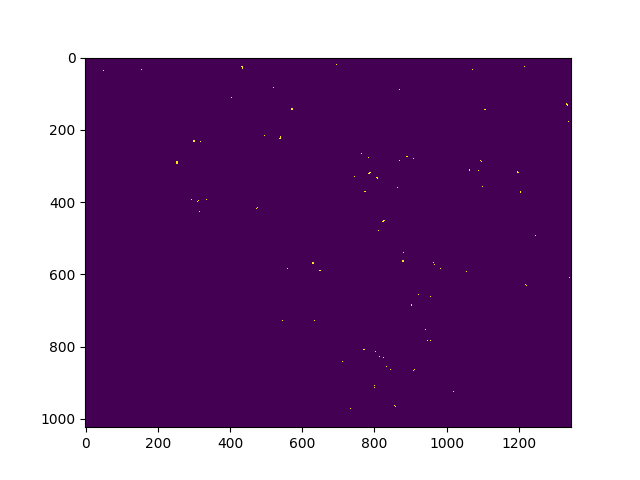

In [11]:
plt.figure()
plt.imshow(bw_vol[:, :, 0])

### Export to tiff

In [12]:
bw_vol = bw_vol*1
for n in range(0, result_vol.shape[2]): 
    scipy.misc.imsave('python-result/result_' + str(n).zfill(2) + '.tiff', bw_vol[:, :, n])

/Users/anish/anaconda3/envs/synapse_analysis/lib/python3.5/site-packages/ipykernel/__main__.py:3: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  app.launch_new_instance()
